In [4]:
import pandas as pd

df = pd.read_csv('data/data_jobs.csv')

In [6]:
df.groupby('job_title_short')['salary_year_avg'].agg([
    'median',
    'min',
    'max',
    'count'
]).sort_values(by=['median', 'min', 'max'], ascending=False)

,median,min,max,count
job_title_short,,,,
Senior Data Scientist,155500.0,45000.0,890000.0,1690
Senior Data Engineer,147500.0,35000.0,425000.0,1591
Data Scientist,127500.0,27000.0,960000.0,5922
Data Engineer,125000.0,15000.0,525000.0,4500
Senior Data Analyst,111175.0,30000.0,425000.0,1131
Machine Learning Engineer,106415.0,30000.0,325000.0,576
Software Engineer,99150.0,28000.0,375000.0,467
Cloud Engineer,90000.0,42000.0,280000.0,65
Data Analyst,90000.0,25000.0,650000.0,5451


# Matplotlib

In [7]:
import matplotlib.pyplot as plt

# convert Job post date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

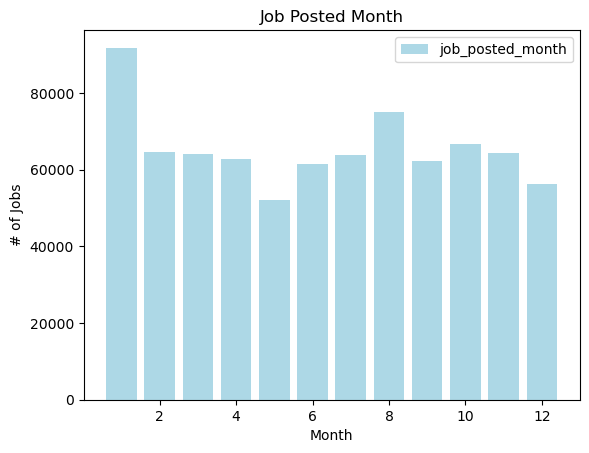

In [40]:
df['job_posted_month'] = df['job_posted_date'].dt.month

plot_df = df.groupby('job_posted_month').size().reset_index().rename(columns={0: 'count'})

plt.bar(plot_df.job_posted_month, plot_df['count'], color="lightblue")

plt.title("Job Posted Month")

plt.ylabel("# of Jobs")
plt.xlabel("Month")
plt.legend(plot_df)
plt.show()

plt.show()

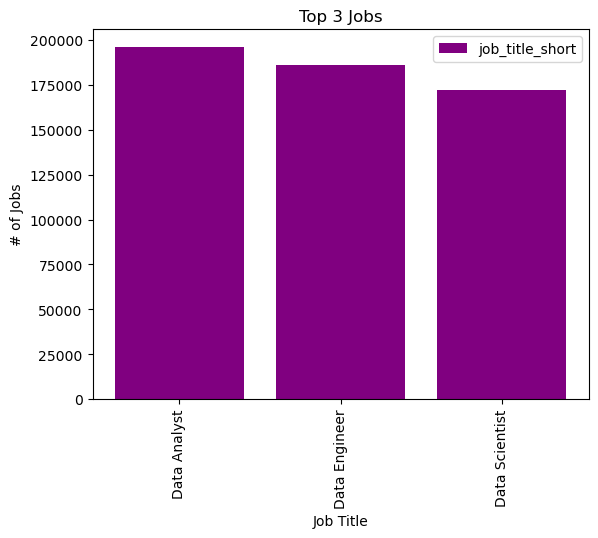

In [61]:
top_three = df.groupby("job_title_short").size().reset_index().rename(columns={0: 'count'}).sort_values(by=['count'], ascending=False).head(3).reset_index(drop=True)

plt.bar(top_three['job_title_short'], top_three['count'], color="purple")

plt.title("Top 3 Jobs")

plt.xticks(rotation=90)
plt.ylabel("# of Jobs")
plt.xlabel("Job Title")

plt.legend(top_three)

plt.show()

Text(0.5, 1.0, 'Median Salary by Job Title')

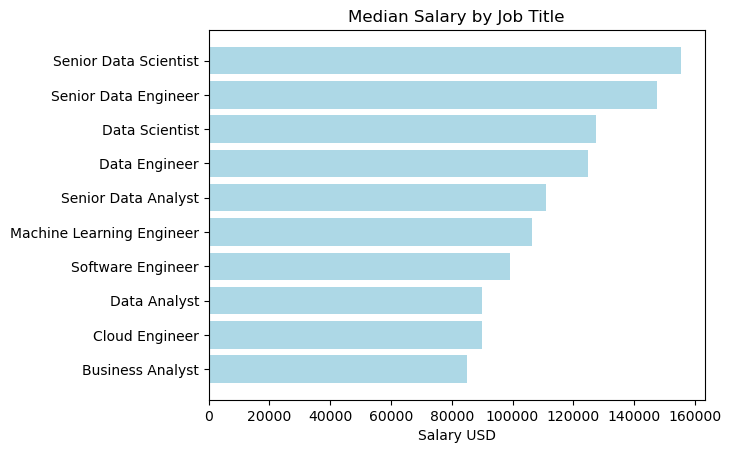

In [71]:
median_job = df.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=True)

plt.barh(median_job.index, median_job.values, color="lightblue")

plt.xlabel('Salary USD')

plt.title("Median Salary by Job Title")